In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Subida de información: (Bases de datos en grupo de 3 años, desde 2010-2024)**

In [26]:
import pandas as pd

#bd = base de datos

bd = pd.read_excel("/content/drive/MyDrive/Base de datos/2010-2012.xlsx")
bd2 = pd.read_excel("/content/drive/MyDrive/Base de datos/2013-2015.xlsx")
bd3 = pd.read_excel("/content/drive/MyDrive/Base de datos/2016-2018.xlsx")
bd4 = pd.read_excel("/content/drive/MyDrive/Base de datos/2019-2021.xlsx")
bd5 = pd.read_excel("/content/drive/MyDrive/Base de datos/2022-2024.xlsx")


# **0. Subida de datos conforme al estudio de inundaciones y sus variables a estudiar:**

In [27]:
# 1. Filtrando el tipo de desastre natural a estudiar (Inundaciones = Flood) en cada de una de los DataFrame creados.

df_inundaciones = bd[bd['Disaster Type'] == 'Flood']
df_inundaciones2 = bd2[bd2['Disaster Type'] == 'Flood']
df_inundaciones3 = bd3[bd3['Disaster Type'] == 'Flood']
df_inundaciones4 = bd4[bd4['Disaster Type'] == 'Flood']
df_inundaciones5 = bd5[bd5['Disaster Type'] == 'Flood']


In [28]:
# 2. Nuevamente Filtrado y asignación multiple a cada de los DataFrame las varaibles con las que se trabajaran.

columnas_relevantes = [
    'Start Year', 'Start Month', 'Start Day',
    'Country', 'Region', 'Location',
    'Total Deaths', 'No. Injured', 'No. Affected',
    'Total Affected', 'Total Damage (\'000 US$)',
    'Magnitude'
]

df_inundaciones = df_inundaciones[columnas_relevantes]

df_inundaciones2 = df_inundaciones2[columnas_relevantes]

df_inundaciones3 = df_inundaciones3[columnas_relevantes]

df_inundaciones4 = df_inundaciones4[columnas_relevantes]

df_inundaciones5 = df_inundaciones5[columnas_relevantes]

df_inundaciones5                    # Visualización a través del interprete de Columnas resultantes del 1er DataFrame.


,Start Year,Start Month,Start Day,Country,Region,Location,Total Deaths,No. Injured,No. Affected,Total Affected,Total Damage ('000 US$),Magnitude
3,2021,1.0,16.0,Bolivia (Plurinational State of),Americas,"Cochabamba, Tarija, Beni, La Paz Departments",1.0,NaN,13000.0,13000.0,NaN,NaN
4,2021,1.0,16.0,Paraguay,Americas,Conception City,NaN,NaN,4000.0,4000.0,NaN,NaN
8,2021,1.0,15.0,Indonesia,Asia,"Kalimantan, Sulawesi Island, Maluku Islands",21.0,NaN,126025.0,126025.0,NaN,NaN
9,2021,1.0,10.0,Philippines,Asia,"Bicol, Western and Eastern Visayas Regions",2.0,NaN,261580.0,261580.0,NaN,NaN
10,2021,1.0,12.0,Malaysia,Asia,"Serian, Samarahan, Miri, Kuching districts (Sa...",6.0,NaN,3000.0,3000.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1597,2024,10.0,4.0,India,Asia,Meghalaya,15.0,NaN,NaN,NaN,NaN,NaN
1603,2024,10.0,17.0,France,Europe,"Rhône, Loire, Haute-Loire, Lozère, Ardèche, Al...",NaN,NaN,2485.0,2485.0,NaN,NaN
1604,2024,9.0,23.0,Sierra Leone,Africa,Bumbuna dam in Bumbuna town (Tonkolili Distric...,NaN,NaN,23596.0,23596.0,NaN,NaN
1609,2024,10.0,22.0,South Africa,Africa,Eastern Cape province,10.0,NaN,3000.0,3090.0,NaN,NaN


# 1. Filtrado y Agrupado específico de información:

**Relación entre la Magnitud de la inundación y Daños económicos totales, medidos en miles de dolares, parte 1: 2010-2012.**

In [74]:
filtro = df_inundaciones[df_inundaciones["Magnitude"]>0]


df_0 = filtro[filtro.columns[0]]
df_1 = filtro[filtro.columns[1]]
df_2 = filtro[filtro.columns[2]]
df_3 = filtro[filtro.columns[3]]
df_4 = filtro[filtro.columns[10]]
df_5 = filtro[filtro.columns[11]]


diccionario = {"Año":df_0, "Mes":df_1, "Dia":df_2, "País":df_3, "Daños Económicos":df_4,"Magnitud":df_5}

nw = pd.DataFrame(diccionario)

limpiar = nw.dropna().copy()


limpiar['Mes'] = limpiar['Mes'].astype(int)
limpiar['Dia'] = limpiar['Dia'].astype(int)

limpiar["Fecha"] = pd.to_datetime(limpiar[["Año", "Mes", "Dia"]].astype(str).agg('-'.join, axis=1))


limpiar.drop(columns=["Año", "Mes", "Dia"], inplace=True)

limpiar = limpiar.reset_index(drop=True)

limpiar


,País,Daños Económicos,Magnitud,Fecha
0,Mexico,"16,000.00","122,621.00",2010-01-26
1,Portugal,"1,350,000.00",483.00,2010-02-20
2,Australia,"109,000.00","431,681.00",2010-02-28
3,Colombia,"1,000,000.00","1,140,146.00",2010-04-06
4,Sri Lanka,"105,000.00","19,210.00",2010-05-14
...,...,...,...,...
62,India,"98,000.00","42,597.00",2012-09-19
63,United Kingdom of Great Britain and Northern I...,"81,000.00","8,507.00",2012-09-23
64,South Africa,"200,000.00","14,489.00",2012-10-24
65,China,"600,000.00","92,141.00",2012-07-09


**Relación Daños Económicos y Magnitud, parte 2: 2013-2015**

In [100]:
filtro2 = df_inundaciones2[df_inundaciones2["Start Year"] > 2012 ]

df_filtro2 = filtro2.iloc[:, [0, 1, 2, 3, 10, 11]]

df_filtro2 = df_filtro2.rename(columns = {"Start Year":"Año","Start Month":"Mes", "Start Day":"Day", "Country":"País", "Total Damage ('000 US$)":"Daños Económicos", "Magnitude":"Magnitud"})

limpiar2 = df_filtro2.dropna().copy()

limpiar2['Mes'] = limpiar2['Mes'].astype(int)
limpiar2['Day'] = limpiar2['Day'].astype(int)

limpiar2["Fecha"] = pd.to_datetime(limpiar2[["Año", "Mes", "Day"]].astype(str).agg('-'.join, axis=1))

limpiar2 = limpiar2.drop(columns=["Año", "Mes", "Day"])


limpiar2 = limpiar2.reset_index(drop=True)


limpiar2

,País,Daños Económicos,Magnitud,Fecha
0,Indonesia,"3,000,000.00","1,746.00",2013-01-17
1,Indonesia,"2,000.00","28,873.67",2013-02-15
2,Mauritius,"2,000.00","1,679.67",2013-03-30
3,Argentina,"1,300,000.00","18,135.40",2013-04-01
4,Kenya,"36,000.00","73,170.41",2013-03-10
...,...,...,...,...
58,Myanmar,"119,000.00","26,424.00",2015-07-15
59,North Macedonia,"87,000.00","5,957.41",2015-08-03
60,Nigeria,"25,000.00","186,816.02",2015-09-05
61,France,"924,000.00","2,895.95",2015-10-03


**Relación Daños Económicos y Magnitud, parte 3: 2016-2019**

In [66]:
filtro3 = df_inundaciones3[df_inundaciones3["Start Year"] > 2015 ]

df_filtro3 = filtro3.iloc[:, [0, 1, 2, 3, 10, 11]]

df_filtro3 = df_filtro3.rename(columns = {"Start Year":"Año","Start Month":"Mes", "Start Day":"Day", "Country":"País", "Total Damage ('000 US$)":"Daños Económicos", "Magnitude":"Magnitud"})

limpiar3 = df_filtro3.dropna().copy()

limpiar3['Mes'] = limpiar3['Mes'].astype(int)
limpiar3['Day'] = limpiar3['Day'].astype(int)

limpiar3["Fecha"] = pd.to_datetime(limpiar3[["Año", "Mes", "Day"]].astype(str).agg('-'.join, axis=1))

limpiar3 = limpiar3.drop(columns=["Año", "Mes", "Day"])


limpiar3 = limpiar3.reset_index(drop=True)


limpiar3


,País,Daños Económicos,Magnitud,Fecha
0,Ecuador,"10,000.00","69,541.98",2016-01-01
1,Brazil,"100,000.00","110,514.83",2016-01-09
2,Indonesia,"2,000.00","235,818.78",2016-02-07
3,China,"170,000.00","383,223.81",2016-03-19
4,New Zealand,"25,000.00","39,333.76",2016-03-23
5,Uruguay,"3,000.00","126,653.11",2016-04-12
6,Russian Federation,"2,000.00","1,834,048.30",2016-04-16
7,India,"150,000.00","70,517.68",2016-04-22
8,Germany,"2,000,000.00","91,554.92",2016-05-31
9,China,"3,000,000.00","197,079.53",2016-06-18


**Relación Daños Económicos y Magnitud, parte 4: 2019-2021**

In [67]:
filtro4 = df_inundaciones4[df_inundaciones4["Start Year"] > 2018]

df_filtro4 = filtro4.iloc[:, [0, 1, 2, 3, 10, 11]]

df_filtro4 = df_filtro4.rename(columns = {"Start Year":"Año","Start Month":"Mes", "Start Day":"Day", "Country":"País", "Total Damage ('000 US$)":"Daños Económicos", "Magnitude":"Magnitud"})

limpiar4 = df_filtro4.dropna().copy()

limpiar4['Mes'] = limpiar4['Mes'].astype(int)
limpiar4['Day'] = limpiar4['Day'].astype(int)

limpiar4["Fecha"] = pd.to_datetime(limpiar4[["Año", "Mes", "Day"]].astype(str).agg('-'.join, axis=1))

limpiar4 = limpiar4.drop(columns=["Año", "Mes", "Day"])


limpiar4 = limpiar4.reset_index(drop=True)


limpiar4



,País,Daños Económicos,Magnitud,Fecha
0,Spain,"58,000.00","6,802.00",2019-01-22
1,Libya,"7,100.00","151,026.83",2019-05-28
2,Russian Federation,"460,000.00","413,323.05",2019-06-28
3,Japan,"100,000.00","10,883.12",2019-08-27
4,Spain,"2,500,000.00","9,114.70",2019-09-11
5,Indonesia,"1,200,000.00","24,986.75",2019-12-31
6,Brazil,"300,000.00","115,219.89",2020-01-17
7,Egypt,"76,000.00","22,124.19",2020-03-11
8,Kenya,"10,000.00","154,389.90",2020-04-18
9,Yemen,"10,000.00","18,949.28",2020-04-15


**Relación Daños Económicos y Magnitud, parte 5: 2022-2024**

In [115]:
filtro5 = df_inundaciones5[df_inundaciones5["Start Year"] > 2021]

df_filtro5 = filtro5.iloc[:, [0, 1, 2, 3, 10, 11]]

df_filtro5 = df_filtro5.rename(columns = {"Start Year":"Año","Start Month":"Mes", "Start Day":"Day", "Country":"País", "Total Damage ('000 US$)":"Daños Económicos", "Magnitude":"Magnitud"})

limpiar5 = df_filtro5.dropna().copy()

limpiar5['Mes'] = limpiar5['Mes'].astype(int)
limpiar5['Day'] = limpiar5['Day'].astype(int)

limpiar5["Fecha"] = pd.to_datetime(limpiar5[["Año", "Mes", "Day"]].astype(str).agg('-'.join, axis=1))

limpiar5 = limpiar5.drop(columns=["Año", "Mes", "Day"])


limpiar5 = limpiar5.reset_index(drop=True)


limpiar5


,País,Daños Económicos,Magnitud,Fecha
0,France,"1,650,000.00",30.00,2023-11-06


# 2. Procesamiento de datos:

**Estadísticas de Daños Económicos y Magnitud de Desastres Naturales (2010-2024) reflejado en plazos de 3 años.**

In [111]:
print("Plazo 2010-2012")

limpiar.describe()

Plazo 2010-2012


,Daños Económicos,Magnitud,Fecha
count,67.00,67.00,67
mean,"1,240,460.97","182,859.06",2011-06-30 15:45:40.298507520
min,176.00,483.00,2010-01-26 00:00:00
25%,"21,000.00","19,075.00",2010-11-20 00:00:00
50%,"110,000.00","42,597.00",2011-06-01 00:00:00
75%,"389,500.00","126,259.50",2012-04-20 00:00:00
max,"40,000,000.00","2,643,786.00",2012-12-17 00:00:00
std,"5,079,718.01","402,579.17",NaN


In [112]:
print("Plazo 2013-2015")

limpiar2.describe()

Plazo 2013-2015


,Daños Económicos,Magnitud,Fecha
count,63.00,63.00,63
mean,"859,418.90","180,318.60",2014-04-28 17:08:34.285714176
min,791.00,830.23,2013-01-17 00:00:00
25%,"11,500.00","19,641.70",2013-08-10 00:00:00
50%,"163,000.00","61,894.97",2014-04-01 00:00:00
75%,"852,000.00","247,444.85",2014-12-15 12:00:00
max,"12,900,000.00","1,829,701.00",2015-11-08 00:00:00
std,"1,894,228.88","298,061.68",NaN


In [113]:
print("Plazo 2016-2018")

limpiar3.describe()

Plazo 2016-2018


,Daños Económicos,Magnitud,Fecha
count,48.00,48.00,48
mean,"1,153,418.33","172,100.27",2017-03-12 19:30:00
min,"1,400.00","2,882.25",2016-01-01 00:00:00
25%,"24,250.00","31,097.10",2016-07-13 18:00:00
50%,"100,000.00","70,029.83",2016-12-29 00:00:00
75%,"294,500.00","149,185.88",2017-10-22 18:00:00
max,"22,000,000.00","1,834,048.30",2018-10-09 00:00:00
std,"3,676,956.77","302,795.16",NaN


In [104]:
print("Plazo 2019 - 2021")

limpiar4.describe()

Plazo 2019 - 2021


,Daños Económicos,Magnitud,Fecha
count,13.00,13.00,13
mean,"3,898,073.92","76,742.12",2020-01-18 00:00:00
min,"7,100.00","6,802.00",2019-01-22 00:00:00
25%,"58,000.00","10,883.12",2019-08-27 00:00:00
50%,"153,861.00","24,986.75",2020-01-17 00:00:00
75%,"1,200,000.00","115,219.89",2020-04-18 00:00:00
max,"40,000,000.00","413,323.05",2021-07-12 00:00:00
std,"10,970,186.57","114,726.08",NaN


In [105]:
print("Plazo 2022-2024")

limpiar5.describe()

Plazo 2022-2024


,Daños Económicos,Magnitud,Fecha
count,1.00,1.00,1
mean,"1,650,000.00",30.00,2023-11-06 00:00:00
min,"1,650,000.00",30.00,2023-11-06 00:00:00
25%,"1,650,000.00",30.00,2023-11-06 00:00:00
50%,"1,650,000.00",30.00,2023-11-06 00:00:00
75%,"1,650,000.00",30.00,2023-11-06 00:00:00
max,"1,650,000.00",30.00,2023-11-06 00:00:00
std,NaN,NaN,NaN


Estadisticas totales 2012 - 2024


# 3. Visualización de los datos, Analisis de la información:

In [118]:
print("Cantidad de afectaciones por país, plazo de tiempo 2010-2012\n")

print(limpiar['País'].value_counts())

print(limpiar2['País'].value_counts())

Cantidad de afectaciones por país, plazo de tiempo 2010-2012

País
India                                                   8
Philippines                                             6
China                                                   5
Sri Lanka                                               4
Thailand                                                3
Viet Nam                                                3
Australia                                               3
Colombia                                                3
Pakistan                                                2
South Africa                                            2
Brazil                                                  2
Nepal                                                   1
Algeria                                                 1
Republic of Korea                                       1
Bulgaria                                                1
Canada                                                  1
Chile

In [117]:
"""import pandas as pd
import matplotlib.pyplot as plt
# Resumen estadístico

print(nw_limpio.describe())

# Gráfico de daños económicos por año
nw_limpio.groupby('Año')['Daños Económicos'].sum().plot(kind='bar')
plt.title('Total de Daños Económicos por Año')
plt.ylabel('Daños Económicos (en $)')
plt.xlabel('Año')
plt.show()"""

"import pandas as pd\nimport matplotlib.pyplot as plt\n# Resumen estadístico\n\nprint(nw_limpio.describe())\n\n# Gráfico de daños económicos por año\nnw_limpio.groupby('Año')['Daños Económicos'].sum().plot(kind='bar')\nplt.title('Total de Daños Económicos por Año')\nplt.ylabel('Daños Económicos (en $)')\nplt.xlabel('Año')\nplt.show()"

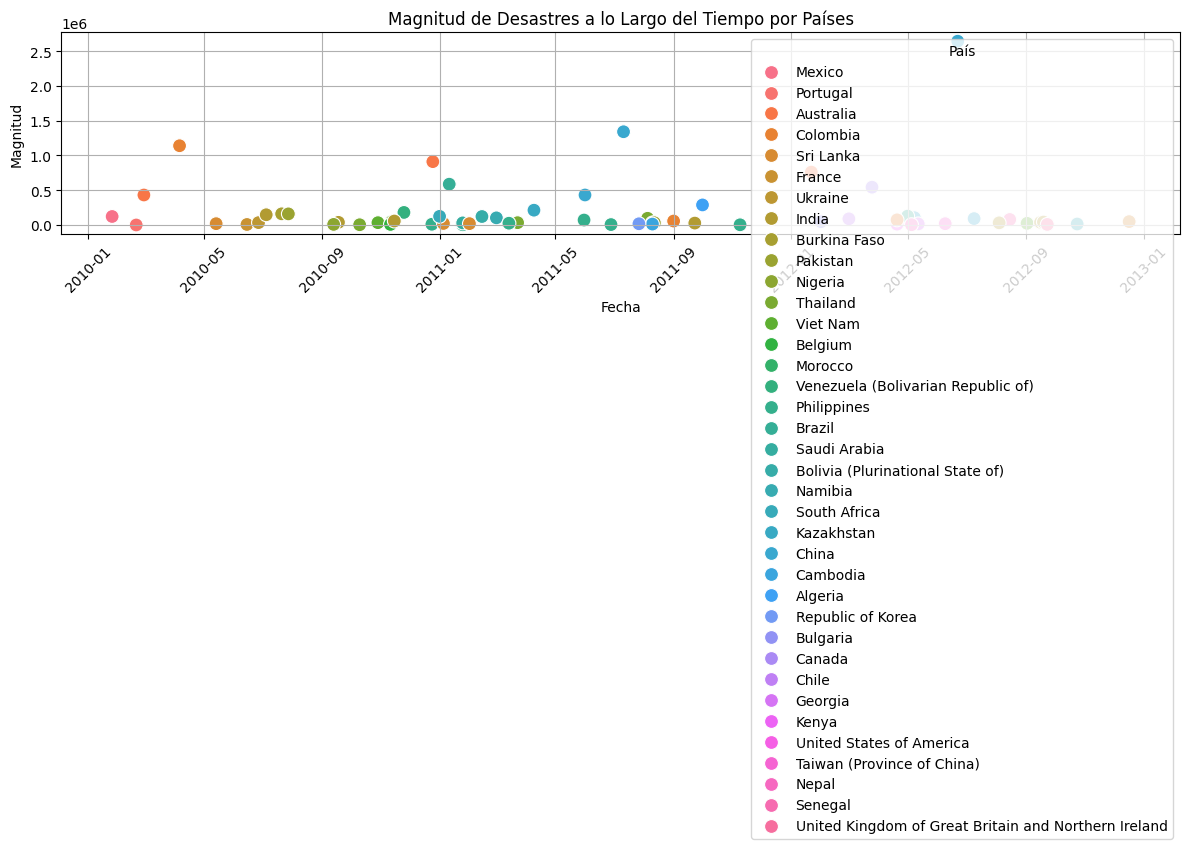

In [86]:

import matplotlib.pyplot as plt
import seaborn as sns

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.scatterplot(data=limpiar, x='Fecha', y='Magnitud', hue='País', s=100)

# Agregar etiquetas y título
plt.title('Magnitud de Desastres a lo Largo del Tiempo por Países')
plt.xlabel('Fecha')
plt.ylabel('Magnitud')
plt.xticks(rotation=45)
plt.legend(title='País')
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

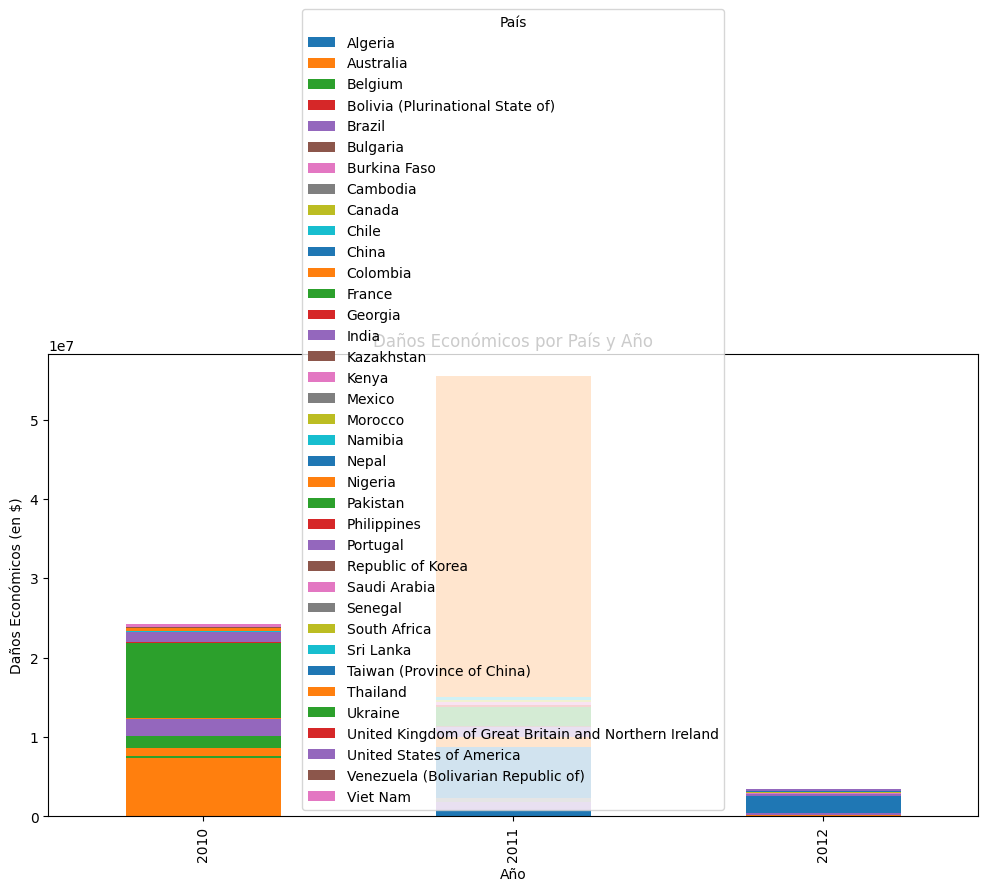

In [ ]:
# Gráfico de barras apiladas de daños económicos por país y año
daños_por_país_año = nw_limpio.groupby(['Año', 'País'])['Daños Económicos'].sum().unstack()
daños_por_país_año.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Daños Económicos por País y Año')
plt.xlabel('Año')
plt.ylabel('Daños Económicos (en $)')
plt.legend(title='País')
plt.show()

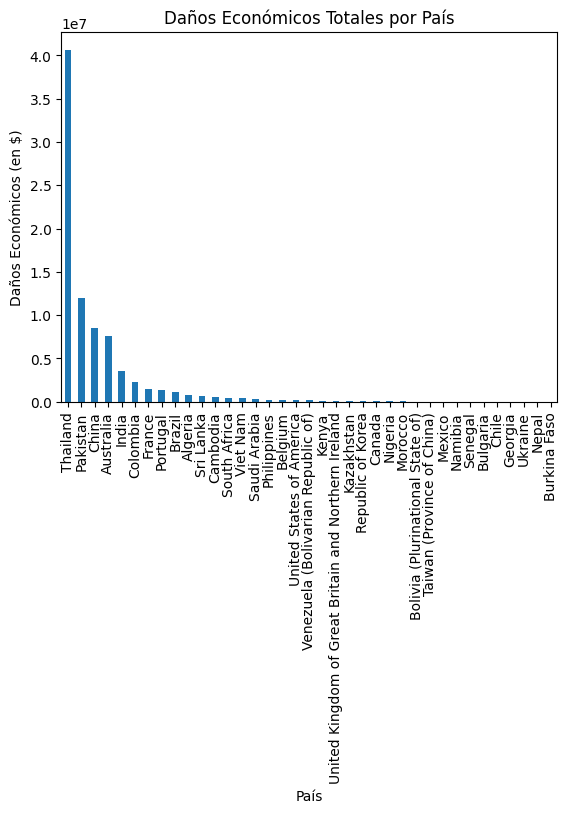

In [ ]:
# Sumar los daños económicos por país
daños_por_país = nw_limpio.groupby('País')['Daños Económicos'].sum().sort_values(ascending=False)
daños_por_país.plot(kind='bar')
plt.title('Daños Económicos Totales por País')
plt.xlabel('País')
plt.ylabel('Daños Económicos (en $)')
plt.xticks(rotation=90)
plt.show()

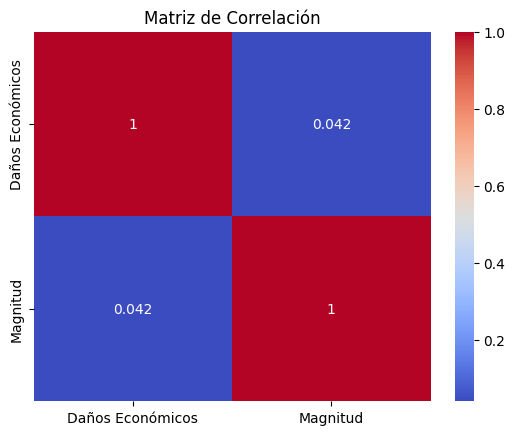

In [ ]:
import seaborn as sns
# Matriz de correlación
correlación = nw_limpio[['Daños Económicos', 'Magnitud']].corr()
sns.heatmap(correlación, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

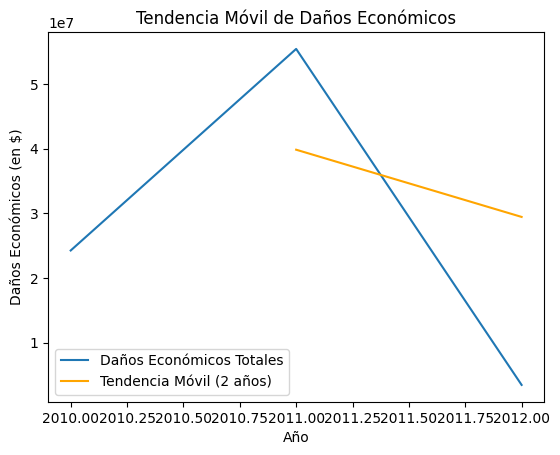

In [ ]:
daños_por_año = nw_limpio.groupby('Año')['Daños Económicos'].sum()
tendencia_móvil = daños_por_año.rolling(window=2).mean()  # Ventana de 2 años
plt.plot(daños_por_año.index, daños_por_año, label='Daños Económicos Totales')
plt.plot(tendencia_móvil.index, tendencia_móvil, label='Tendencia Móvil (2 años)', color='orange')
plt.title('Tendencia Móvil de Daños Económicos')
plt.xlabel('Año')
plt.ylabel('Daños Económicos (en $)')
plt.legend()
plt.show()